In [1]:
import configparser
from fast_arrow import (
    Client,
    Stock,
    OptionChain,
    Option,
)
import pandas as pd
import seaborn as sns

/Users/weston/.pyenv/versions/fast_arrow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/weston/.pyenv/versions/fast_arrow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#
# get the authentication configs
#
config_file = "../config.debug.ini"
config = configparser.ConfigParser()
config.read(config_file)
username = config['account']['username']
password = config['account']['password']


#
# initialize and authenticate Client
#
client = Client(username=username, password=password)
client.authenticate()

True

In [3]:
#
# fetch the stock info for TLT
#
symbol = "TLT"
stock = Stock.fetch(client, symbol)


#
# get the TLT option chain info
#
stock_id = stock["id"]
option_chain = OptionChain.fetch(client, stock_id)
option_chain_id = option_chain["id"]
expiration_dates = option_chain['expiration_dates']


#
# reduce the number of expiration dates we're interested in
#
next_3_expiration_dates = expiration_dates[0:3]


#
# get all options on the TLT option chain
#
ops = Option.in_chain(client, option_chain_id, expiration_dates=next_3_expiration_dates)

#
# merge in market data fro TLT option instruments
#
ops = Option.mergein_marketdata_list(client, ops)

In [4]:
df = pd.DataFrame.from_dict(ops)

In [5]:
# 
# fix the data
# 
df.strike_price = pd.to_numeric(df.strike_price, errors='coerce')

In [6]:
# 
# select the data we want to chart
#
ddf = df
ddf = ddf[ ddf.strike_price.ge(118.0) ]
ddf = ddf[ ddf.strike_price.le(125.0) ]
ddf = ddf.sort_values(["expiration_date"])

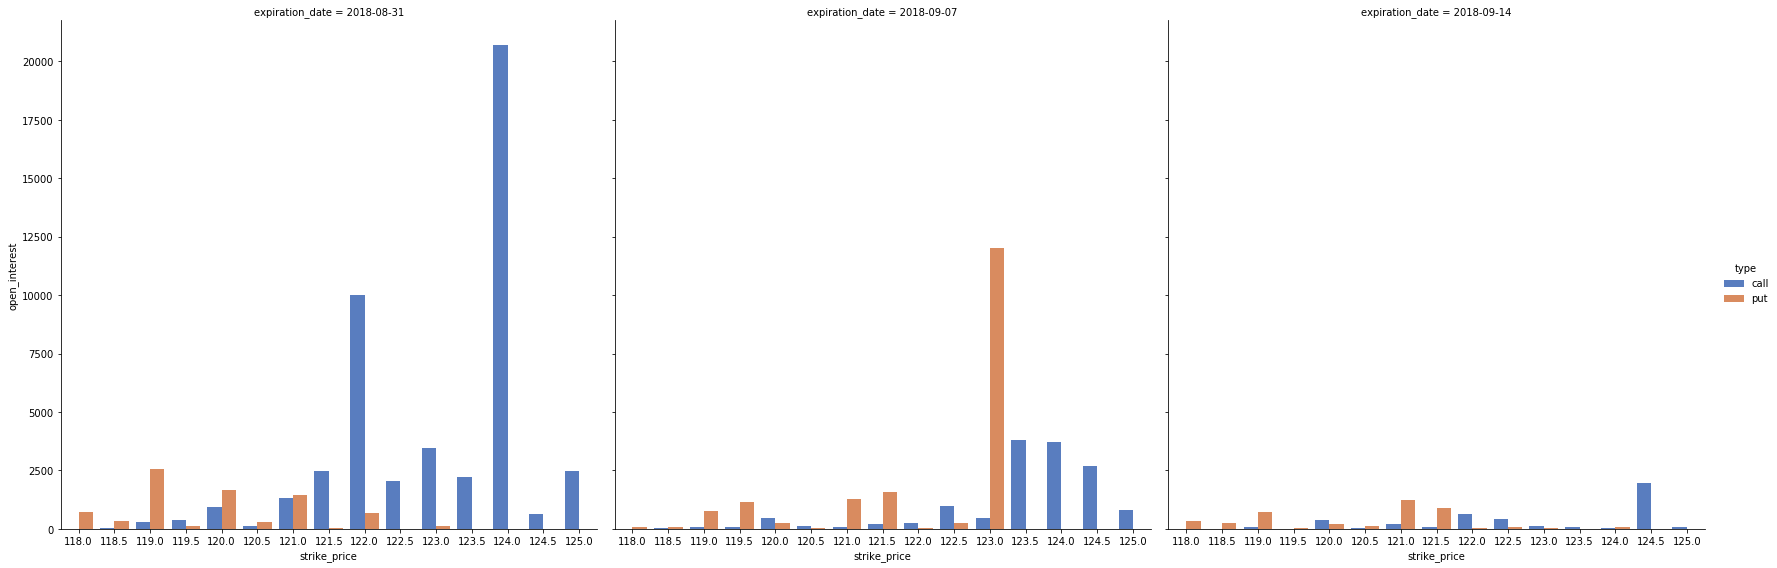

In [7]:
sns.catplot(
    x="strike_price", 
    y="open_interest", 
    hue="type",
    col="expiration_date",
    data=ddf,
    height=8, 
    kind="bar", 
    palette="muted", 
    ci=None)